# Lab 4 - Assessment
### Jackson Rolando

## The purpose: 
1. Which (if any) morphological and biogeochemical traits distinguish between originating species 
of the scat samples? 
 
2. Why do you think those traits differ across species?

### Notes on *Reid, 2015*

- Only three main differences found: diameter, mass, and C:N ratio
- bobcats and coyotes scratch the ground, leave scent marks
    - coyotes: scratch adjacent to urine
    - bobcats: more controlled scratches, deposit at one end
- C:N - Carbon to Nitrogen ratio
    - plant-eaters: high
    - meat-eaters: low
    - precision was 0.2
- Analysis:
    - one-way ANOVA: differences in means
    - log transformation necessary 
- Some irregular scats coded as flat and lacking some/all measurements
- gray foxes had weird stuff going on
- 19 samples missing one or more features
- Results:
    - Diameter - coyote vs others
    - Mass - gray fox vs others
    - C:N - all groups
    - best form traits:
        - number of pieces
        - diameter
        - taper length
        - log mass
        - C:N ratio - <u>distinct for all three species</u>
    - scrape doesn't help a TON, for this data, really just for Bobcats

### Notes on animals:
#### [Coyotes](https://en.wikipedia.org/wiki/Coyote)
- M: 8 to 20 kg, F: 7 to 18 kg
- shares ancestor with NA grey wolves
- mark territory with raised-leg urination and ground-scratching
- mainly animals, sometimes plants
- may eat bobcats
- feeding territories of 0.4 to 62 $km^2$
- commonly livestock predators

#### [Gray Foxes](https://en.wikipedia.org/wiki/Gray_fox)
- 3.6 to 7 kg
- omnivorous - in NA, insectivorous and herbivorous - fruit
- hunt for same things as bobcats and coyotes
    - gives space to coyote
    - sometimes killed by coyotes and bobcats - result of competition, not usually eaten
- usually stay close to the den
- to escape coyotes, often near humans

#### [Bobcats](https://en.wikipedia.org/wiki/Bobcat)
- M: 6.4–18.3 kg, F: 4–15.3 kg
- carnivorous
    - sometimes larger animals to return to to feed on
    - usually hare
    - number of hare correlates with number of bobcats
- could have home ranges, moving 3 to 11 km along a habitual route, some of them are transient, some stay very close to a den
- sometimes go after livestock or pets

### Notes on [How Biologists Estimate Populations of Animals](https://adfg.alaska.gov/index.cfm?adfg=wildlifenews.view_article&articles_id=814#:~:text=Another%20efficient%20method%20researchers%20have,them%20to%20estimate%20the%20entire):
- census
- capture, mark recapture
- aerial

### Notes on [Estimating Bobcat Population Sizes](https://academic.oup.com/jmammal/article/90/1/129/847663)
- uses tests to determine population based on how many repeat individuals' scat was sampled
- male bobcats' home range: ~3.21 $km^2$

## I. Introduction

Coyotes, Gray Foxes, and Bobcats are three medium-large-sized mamalian species which inhabit the coastal regions of California in question. Coyotes are omnivorous, suplementing their meat-heavy diet with occasional fruit. Gray foxes mostly eat small animals, insects, and fruit. Bobcats are carnivorous, most often praying on hares.

Coyotes are the largest of the three species at 7 to 20 kg, bobcats come in second at 4-18 kg, gray foxes are the smallest of the three at 3.6 to 7 kg. Coyotes and bobcats sometimes kill gray foxes that come into their territory, not eating them necessarily, just out of intimidation and protection of their own turf. Coyotes and bobcats are quite territorial, often marking their territory boundries with scratches around where they poop.  

These three species interact with humans infrequently, though they do come around. The gray fox, in order to avoid coyote or bobcat territory, tend to live closer to humans, unlike the others which tend to stay away. On occasion, coyotes and bobcats pray on livestock, sometimes even house pets.

Though none of these species are endangered, humans are directly competing with these species for space, and as stated they sometimes interact with the humans implanted in their habitat, so it makes sense to keep track of populations in specified areas. There are many ways to measure populations, like direct observation and aerial photos, though since these species aren't easy to spot against the landscape and are usually quite good at avoiding humans, this can prove difficult. Another method of population estimation is through capture, tag, recapture. This can also prove quite difficult, as it requires that we actually track down these animals, catch them, then add the stress of tagging them in some way. This is time, consuming, involved, dangerous, and can even result in the animals changing their behavior. So, a less-invasive method of population estimation is being explored. Enter, scat. 

Collecting scat samples requires no contact with the animals themselves, but can be used similarly to capture, tag, recapture to estimate population, as DNA can be used to identify specific individuals. So, if we can find a way to determine which species a sample belongs to, we can estimate the populations without every needing to disturb the wildlife. 

We're setting out to find if there are morphological or chemical properties of the scat of these three species that can be used to tell them apart, in order to noninvasively estimate their separate populations. 

## II. Analysis
### Cleaning:

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

We'll load the data:

In [23]:
df = pd.read_csv("Dataset_BobcatsCoyotesFoxes.csv");
df.head()

,Species,Month,Year,Site,Location,Age,Number,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,Ropey,Segmented,Flat,Scrape
0,Coyote,January,2012,YOLA,Edge,5,2,9.5,25.7,41.9,1.63,15.89,-26.85,6.94,8.5,0,0,0,0
1,Coyote,January,2012,YOLA,Edge,3,2,14.0,25.4,37.1,1.46,17.61,-29.62,9.87,11.3,0,0,0,0
2,Bobcat,January,2012,YOLA,Middle,3,2,9.0,18.8,16.5,0.88,8.40,-28.73,8.52,8.1,1,1,0,1
3,Coyote,January,2012,YOLA,Middle,5,2,8.5,18.1,24.7,1.36,7.40,-20.07,5.79,11.5,1,0,0,0
4,Coyote,January,2012,YOLA,Edge,5,4,8.0,20.7,20.1,0.97,25.45,-23.24,7.01,10.6,0,1,0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Species    110 non-null    object 
 1   Month      110 non-null    object 
 2   Year       110 non-null    int64  
 3   Site       110 non-null    object 
 4   Location   110 non-null    object 
 5   Age        110 non-null    int64  
 6   Number     110 non-null    int64  
 7   Length     110 non-null    float64
 8   Diameter   104 non-null    float64
 9   Taper      93 non-null     float64
 10  TI         93 non-null     float64
 11  Mass       109 non-null    float64
 12  d13C       108 non-null    float64
 13  d15N       108 non-null    float64
 14  CN         108 non-null    float64
 15  Ropey      110 non-null    int64  
 16  Segmented  110 non-null    int64  
 17  Flat       110 non-null    int64  
 18  Scrape     110 non-null    int64  
dtypes: float64(8), int64(7), object(4)
memory usage: 1

We'll convert the appropriate features to categorical:

In [25]:
cat_cols = ["Species", "Month", "Year", "Site", "Location", "Age", "Number", "Ropey", "Segmented", "Flat", "Scrape"]
for col in cat_cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Species    110 non-null    category
 1   Month      110 non-null    category
 2   Year       110 non-null    category
 3   Site       110 non-null    category
 4   Location   110 non-null    category
 5   Age        110 non-null    category
 6   Number     110 non-null    category
 7   Length     110 non-null    float64 
 8   Diameter   104 non-null    float64 
 9   Taper      93 non-null     float64 
 10  TI         93 non-null     float64 
 11  Mass       109 non-null    float64 
 12  d13C       108 non-null    float64 
 13  d15N       108 non-null    float64 
 14  CN         108 non-null    float64 
 15  Ropey      110 non-null    category
 16  Segmented  110 non-null    category
 17  Flat       110 non-null    category
 18  Scrape     110 non-null    category
dtypes: category(11), float64(8)
m

#### Searching for Outliers
Now we'll look at distributions of the continuous variables, with their means:

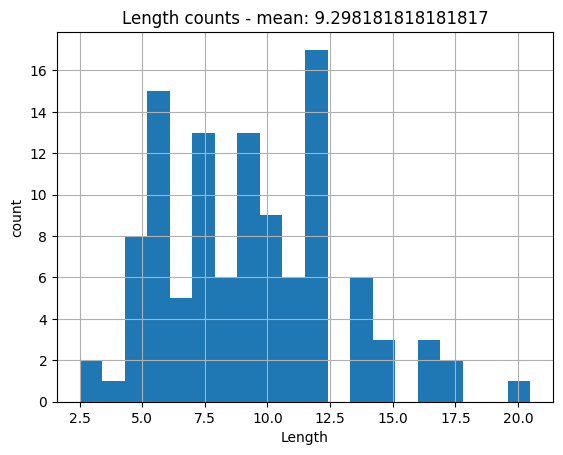

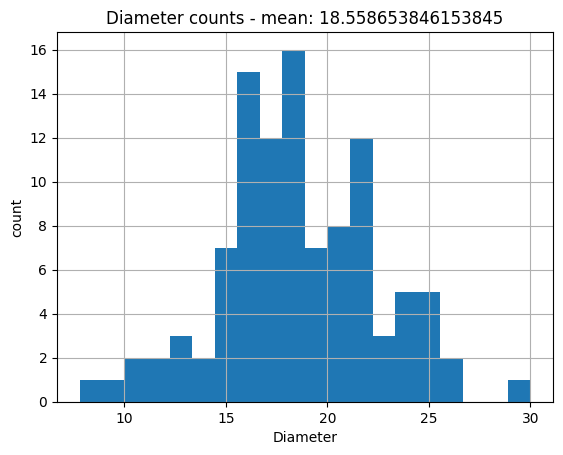

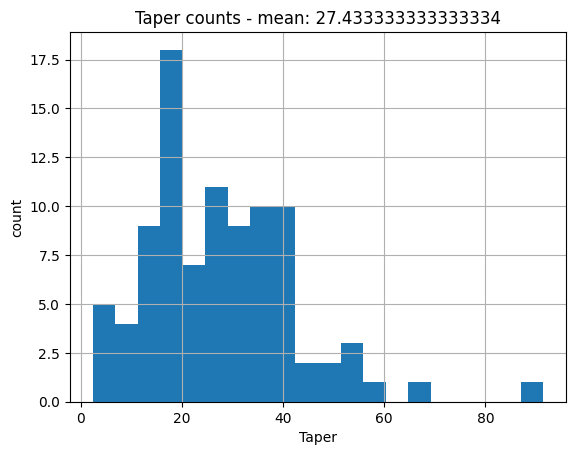

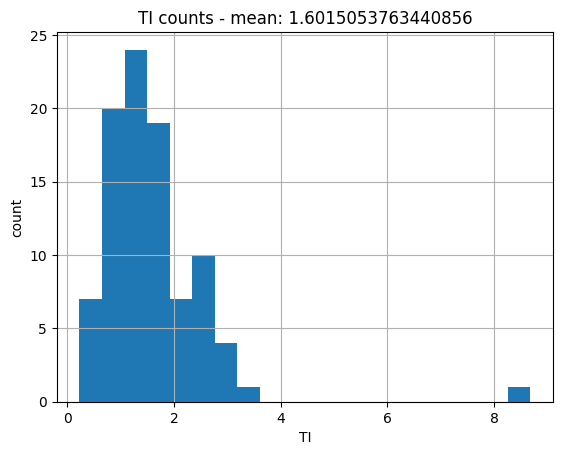

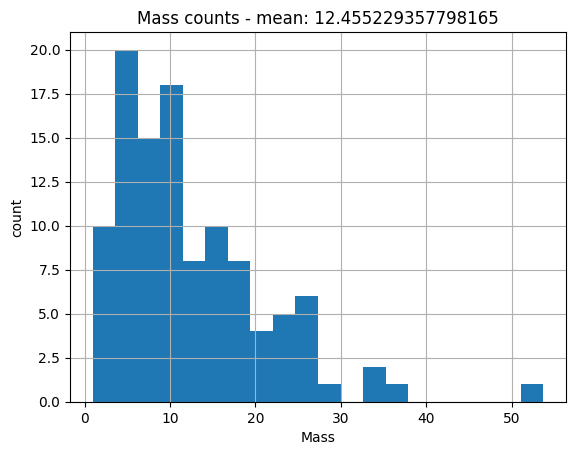

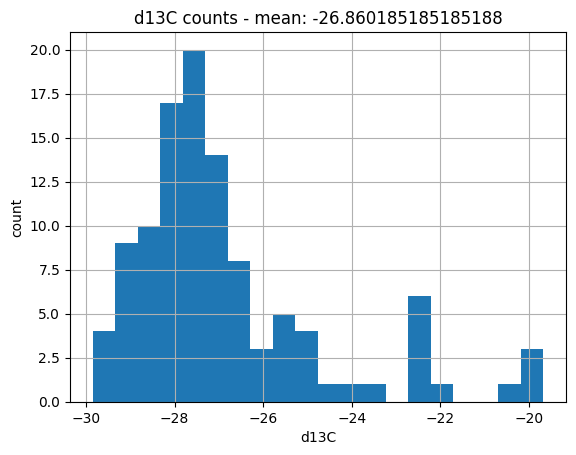

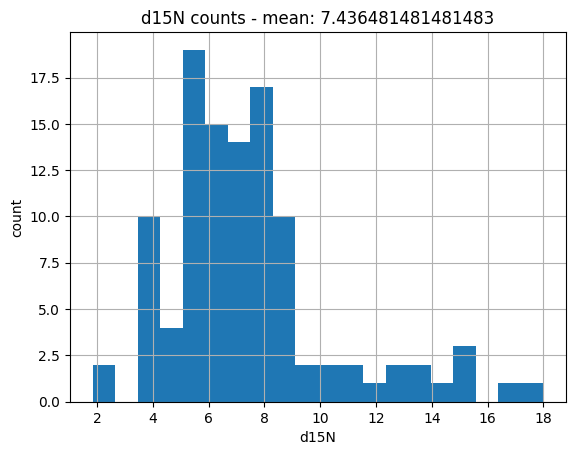

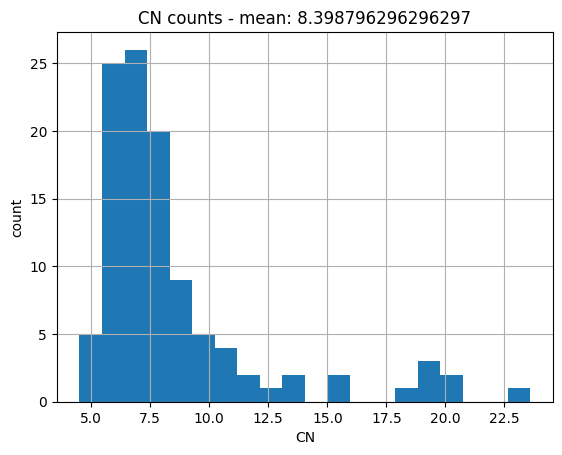

In [26]:
cont_cols = ["Length", "Diameter", "Taper", "TI", "Mass", "d13C", "d15N", "CN"]
for col in cont_cols:
    ax = df[col].hist(bins=20)
    ax.set_title(col + " counts - mean: " + str(df[df[col].notna()][col].mean()))
    ax.set_xlabel(col)
    ax.set_ylabel("count")
    plt.show()

At first glance, there seem to be outliers in the data. Taper has only a few points above 80, significantly separated from the rest of the data. TI does as well, though with values above 8. Mass also seems to have some isolated points greater than 50. For the d13C, d15N, and CN results, the distribution seems very skewed to the right. Let's get their z-scores (not including missing values) and look at the outliers, using a z-score of $\pm3$:

In [27]:
for col in cont_cols:
    df_vals = df[df[col].notna()]
    print(col + ":\n" + str(df_vals[np.abs(stats.zscore(df_vals[col])) > 3]) + "\n")

Length:
  Species    Month  Year  Site Location Age Number  Length  Diameter  Taper  \
9  Bobcat  January  2012  ANNU   Middle   5      1    20.5      18.0   21.4   

     TI   Mass   d13C  d15N   CN Ropey Segmented Flat Scrape  
9  1.19  11.22 -27.35  6.06  7.7     1         1    0      0  

Diameter:
Empty DataFrame
Columns: [Species, Month, Year, Site, Location, Age, Number, Length, Diameter, Taper, TI, Mass, d13C, d15N, CN, Ropey, Segmented, Flat, Scrape]
Index: []

Taper:
   Species     Month  Year  Site Location Age Number  Length  Diameter  Taper  \
99  Coyote  November  2011  ANNU  OffEdge   1      4     6.5      24.0   91.5   

      TI  Mass   d13C   d15N   CN Ropey Segmented Flat Scrape  
99  0.81  53.7 -23.84  12.59  7.0     0         1    0      0  

TI:
    Species      Month  Year  Site Location Age Number  Length  Diameter  \
76  GrayFox  September  2011  ANNU   Middle   4      2     7.5       7.8   

    Taper    TI  Mass   d13C  d15N   CN Ropey Segmented Flat Scrape  

In [28]:
coyote_mass_mean = (df[df["Species"] == "Coyote"]["Mass"].sum() - df.iloc[99]["Mass"]) / (df["Species"] == "Coyote").sum()
print(coyote_mass_mean)

df[df["Species"] == "Coyote"][np.abs(stats.zscore(df[df["Species"] == "Coyote"]["Mass"])) > 3]

16.327499999999997


,Species,Month,Year,Site,Location,Age,Number,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,Ropey,Segmented,Flat,Scrape
99,Coyote,November,2011,ANNU,OffEdge,1,4,6.5,24.0,91.5,0.81,53.7,-23.84,12.59,7.0,0,1,0,0


For length, there is one row with an outlier, belonging to a bobcat. This sample had a length of 20.5, but it has a greater-than-average mass, so we'll leave it. 

Taper had a single outlier, but looking at the TI value (which is well within the normal range), it looks like this may have been an error when entering, since the ratio of Taper to Diameter should yield the TI value. In this case, the TI of 0.81 times the Diameter of 24 gives a Taper of 19.44, which leads one to belive that the person who entered this value may have switched the 1 and the 9, so we'll change the Taper value to 19.5 (assuming the decimal was correct, and the discrepancy with my calculated value is from rounding in the initial generation of the data set). 

There's one outlier for TI, a grey fox sample. Its value makes sense for the Taper and Diameter values, and its taper length doesn't exceed the sample's length, so we'll leave it.

There's one large outlier for mass, with a value of 53.7 grams. It comes from a coyote, the largest animal of the three, but is still huge, as the coyote's samples' mean mass is 18.245. Checking the z-score of this sample against only other coyote samples, it still has a z-score of above 3, so we'll set it to the average coyote sample mass, without this sample included in the mean calculation.

For d13C levels, all three outliers are from coyotes, so we'll keep them. Same for d15N. For CN values, all three outliers are from gray foxes. They are very high, which makes sense for the gray foxes' mostly herbivorous diet, so it makes sense for them to be on the upper end of the spectrum. We'll leave these as well. 

In [29]:
df.loc[99, "Taper"] = 19.5
df.loc[99, "Mass"] = coyote_mass_mean

#### Handling Missing Values
Now, we'll look at missing values in the data:

In [30]:
for col in df:
    if(df[col].isna().sum() > 0):
        print("\n" + col + ": \n" + str(df[df[col].isna()]))


Diameter: 
    Species     Month  Year  Site Location Age Number  Length  Diameter  \
10  GrayFox   January  2012  ANNU   Middle   3      1     8.0       NaN   
12  GrayFox   January  2012  ANNU   Middle   3      1    12.0       NaN   
13  GrayFox   January  2012  ANNU   Middle   3      1    11.5       NaN   
14  GrayFox   January  2012  ANNU   Middle   1      1     8.5       NaN   
28  GrayFox     April  2012  ANNU   Middle   1      1    10.0       NaN   
94   Coyote  November  2011  ANNU  OffEdge   3      1     4.5       NaN   

    Taper  TI   Mass   d13C   d15N    CN Ropey Segmented Flat Scrape  
10    NaN NaN   2.51 -25.79   7.83  20.5     0         0    1      0  
12    NaN NaN  18.14 -25.18  10.10  15.5     0         0    1      0  
13    NaN NaN   8.17 -25.73   9.72  18.9     0         0    1      0  
14    NaN NaN   3.43 -26.17   8.07  19.9     0         0    1      0  
28    NaN NaN   5.53 -26.58   8.17  18.9     0         0    1      0  
94    NaN NaN  20.29 -22.69  13.32  

The missing values for diameter are just for those that are categorized as flat. We'll zero these out. The missing values for taper and TI are of the same rows and are categorized as a few different types. For the flat ones, we'll zero them out. For ropey and segmented, I'll set these to the average taper/TI value for each species. For mass, d13C, d15N, and CN, there aren't very many missing values, so we'll set them to the average value for each species:

In [31]:
species_names = ["Coyote", "Bobcat", "GrayFox"]

means = {}
for col in ["Taper", "TI", "d13C", "d15N", "CN", "Mass"]:
    means[col] = {}
    df_notna = df[df[col].notna()][["Species", col]]
    for spec in species_names:
        means[col][spec] = df_notna[df_notna["Species"] == spec][col].mean()

def fill_taper(row):
    ret_row = row.copy()
    if np.isnan(row[0]) and np.isnan(row[1]):
        if(row[3] == 0 and row[4] == 0 and row[2] != 0):
            ret_row[0] = 0
            ret_row[1] = 0
        else:
            ret_row[0] = means["Taper"][row[5]]
            ret_row[1] = means["TI"][row[5]]
    return ret_row

df[["Taper", "TI", "Flat", "Segmented", "Ropey", "Species"]] = df[["Taper", "TI", "Flat", "Segmented", "Ropey", "Species"]].apply(fill_taper, axis=1)

df["Diameter"] = df["Diameter"].fillna(0)

def fill_mean(row):
    ret_row = row.copy()
    if(np.isnan(row[1])):
        ret_row[1] = means[col][row[0]]
    return ret_row

for col in ["d13C", "d15N", "CN", "Mass"]:
    df[["Species", col]] = df[["Species", col]].apply(fill_mean, axis=1)

In [32]:
num_cols_with_na = 0
for col in df:
    if(df[col].isna().sum() > 0):
        num_cols_with_na += 1

if(num_cols_with_na > 0): print(str(num_cols_with_na) + "cols with na")
else: print("fill success")

fill success


### Feature Categorization
The features of the data fall into categories of morphological, biogeochemical, contextual, and non-traits:

|  feature  | type of feature |
|-----------|-----------------|
| Species   | non-feature     |
| Month     | non-feature     |
| Year      | non-feature     |
| Site      | non-feature     |
| Location  | contextual      |
| Age       | contextual      |
| Number    | morphological   |
| Length    | morphological   |
| Diameter  | morphological   |
| Taper     | morphological   |
| TI        | morphological   |
| Mass      | morphological   |
| d13C      | biogeochemical  |
| d15N      | biogeochemical  |
| CN        | biogeochemical  |
| Ropey     | morphological   |
| Segmented | morphological   |
| Flat      | morphological   |
| Scrape    | contextual      |

### Visualization and Testing
Now let's see what meaning we can get from the data.

Here we'll examine the continuous morphological and biogeochemical features for each species:

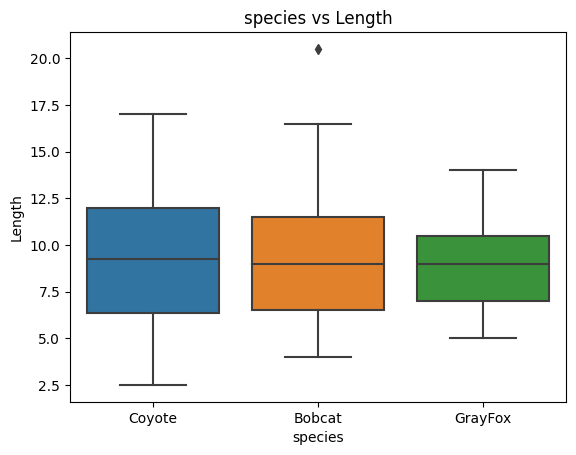

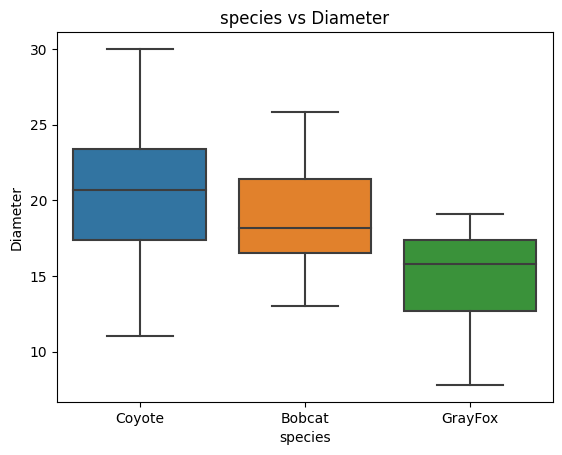

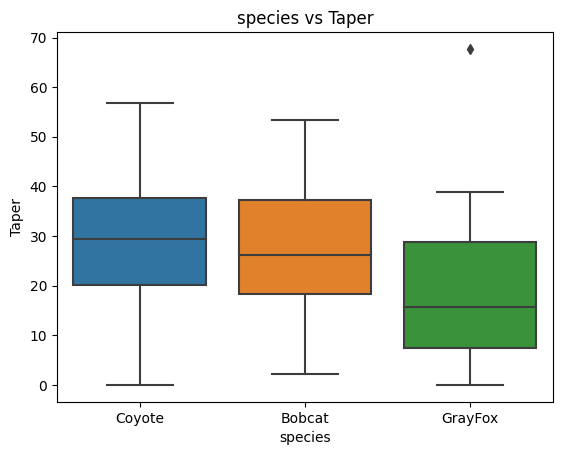

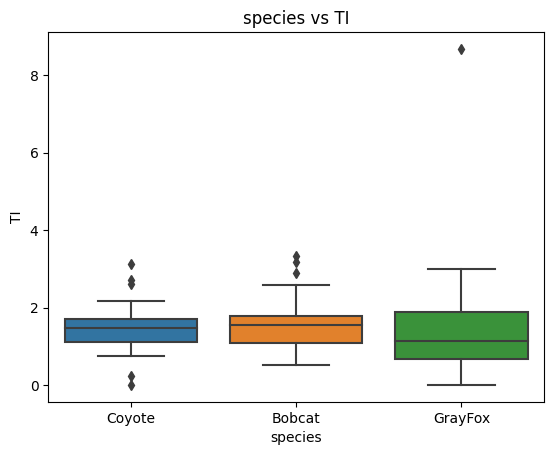

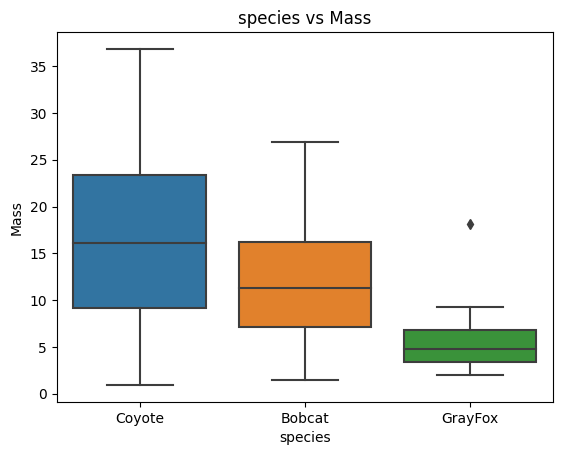

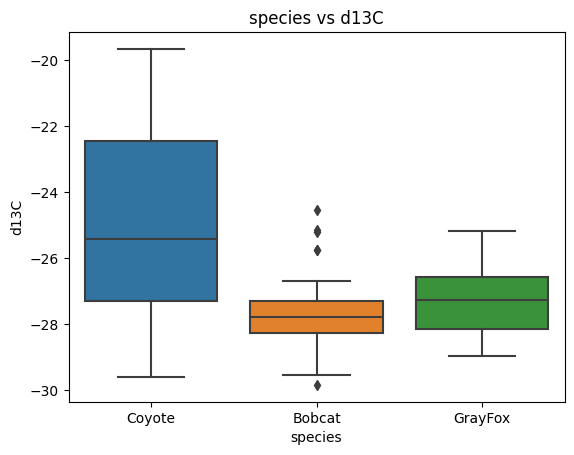

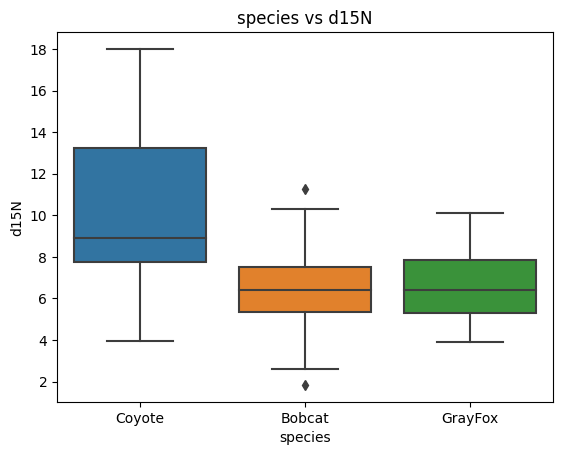

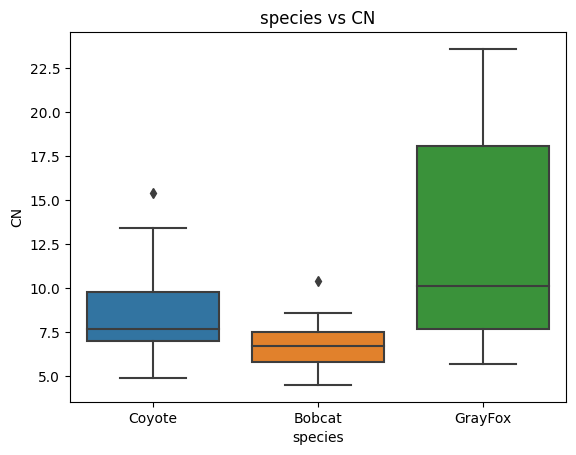

In [33]:
for col in cont_cols:
    df_to_plot = df
    if(col == 'Diameter'):
        df_to_plot = df[df["Diameter"] != 0]
    ax = sns.boxplot(x='Species', y=col, data=df_to_plot)
    ax.set_title('species vs ' + col)
    ax.set_xlabel('species')
    ax.set_ylabel(col)
    plt.show()

We'll also look at a Kruskall-Wallis test for each variable, between each species:

In [34]:
from itertools import combinations
combs = combinations(species_names, 2)
comb_names = []

for first, second in combs:
    comb_names.append((first, second))

for col in cont_cols:
    print(col + ": ")
    for i in range(len(comb_names)):
        first, second = comb_names[i]
        if(col == 'Diameter'):
            df_to_test = df[df['Diameter'] != 0]
        else:
            df_to_test = df
        stat, p = stats.kruskal(df_to_test[df_to_test["Species"] == first][col], df_to_test[df_to_test["Species"] == second][col])
        print(first + " vs " + second + " - p: " + str(p))
    print()

Length: 
Coyote vs Bobcat - p: 0.7787374554420805
Coyote vs GrayFox - p: 0.655406712131614
Bobcat vs GrayFox - p: 0.887623420420247

Diameter: 
Coyote vs Bobcat - p: 0.13634176330654174
Coyote vs GrayFox - p: 0.00015877770645916832
Bobcat vs GrayFox - p: 3.109508666134482e-05

Taper: 
Coyote vs Bobcat - p: 0.36431302739357396
Coyote vs GrayFox - p: 0.004576433409536121
Bobcat vs GrayFox - p: 0.00879839990031191

TI: 
Coyote vs Bobcat - p: 0.6772683915823277
Coyote vs GrayFox - p: 0.4274591105192602
Bobcat vs GrayFox - p: 0.2042231764386041

Mass: 
Coyote vs Bobcat - p: 0.04341742987703183
Coyote vs GrayFox - p: 4.288369598723094e-06
Bobcat vs GrayFox - p: 6.492912681852749e-07

d13C: 
Coyote vs Bobcat - p: 1.3146057683283435e-05
Coyote vs GrayFox - p: 0.0038957800288054794
Bobcat vs GrayFox - p: 0.09749080149470472

d15N: 
Coyote vs Bobcat - p: 1.132965726650809e-06
Coyote vs GrayFox - p: 6.095569732189944e-05
Bobcat vs GrayFox - p: 0.9919626604837612

CN: 
Coyote vs Bobcat - p: 4.5778

Looking at the box plots and the Kruskal-Wallis tests, it looks like most of the features could be used to differentiate the species, except for length and TI. 

Diameter, Taper, and Mass seem to be good separators of Gray Foxes vs everything else with p-values of less than 0.01, while d13C and d15N seem to tell coyotes from non-coyotes with p-values of less than 0.01. Bobcats can be told apart by their CN. 

This goes against what Reid said, that coyotes could be told from non-coyotes by their diameter. This is not the case for our data. Maybe we had a differenct subset?

It does not look like these three species can be told apart just by these continuous morphological traits. They need biogeochemical tests done as well. Gray foxes can be separated from non-gray foxes, but in order to tell coyotes from bobcats, testing, not just measuring, is required. 

Let's visualize the categorical variables against species:

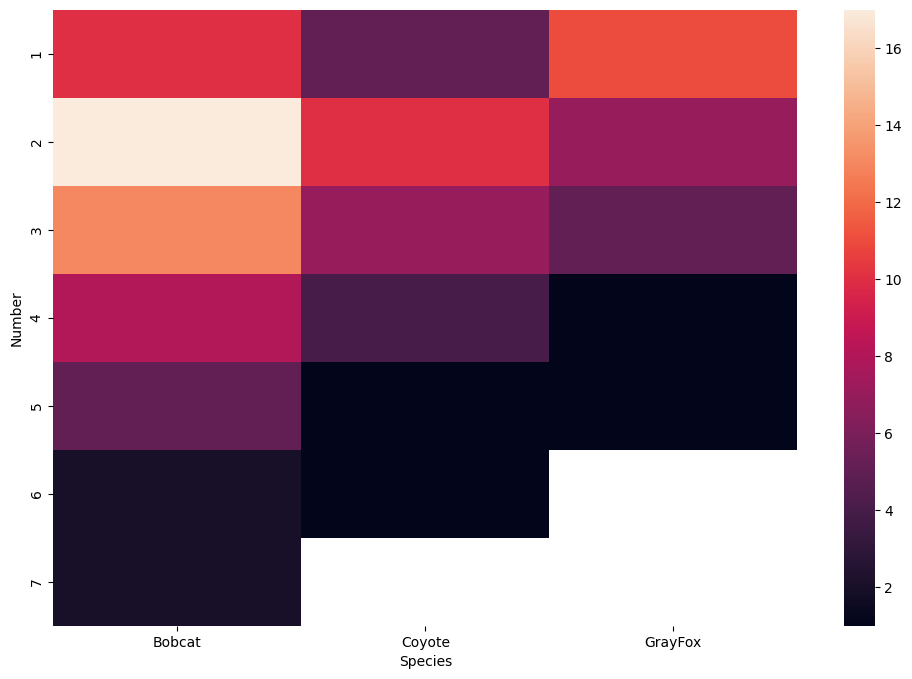

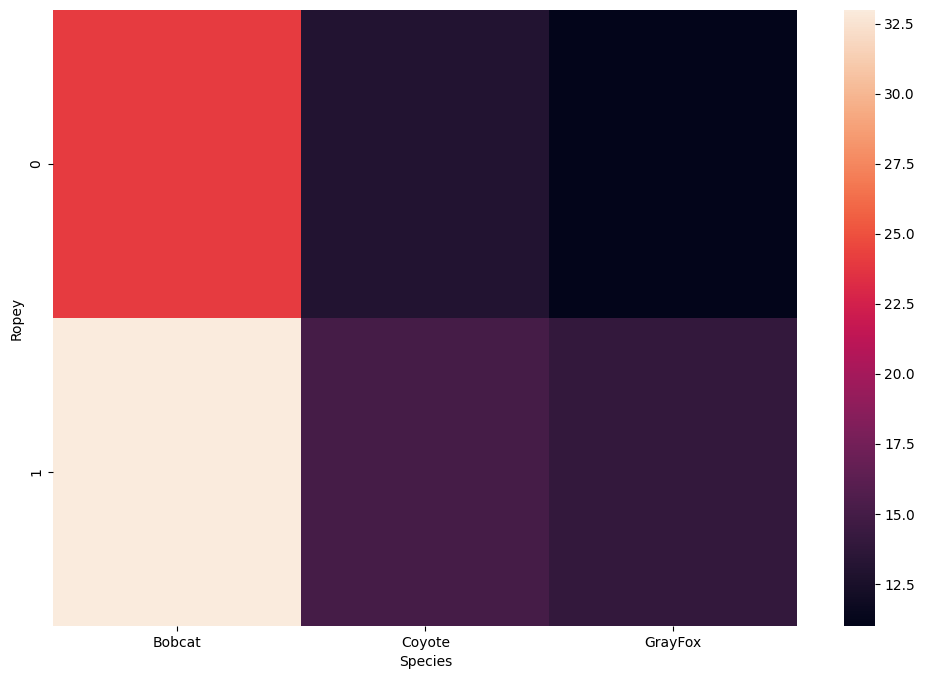

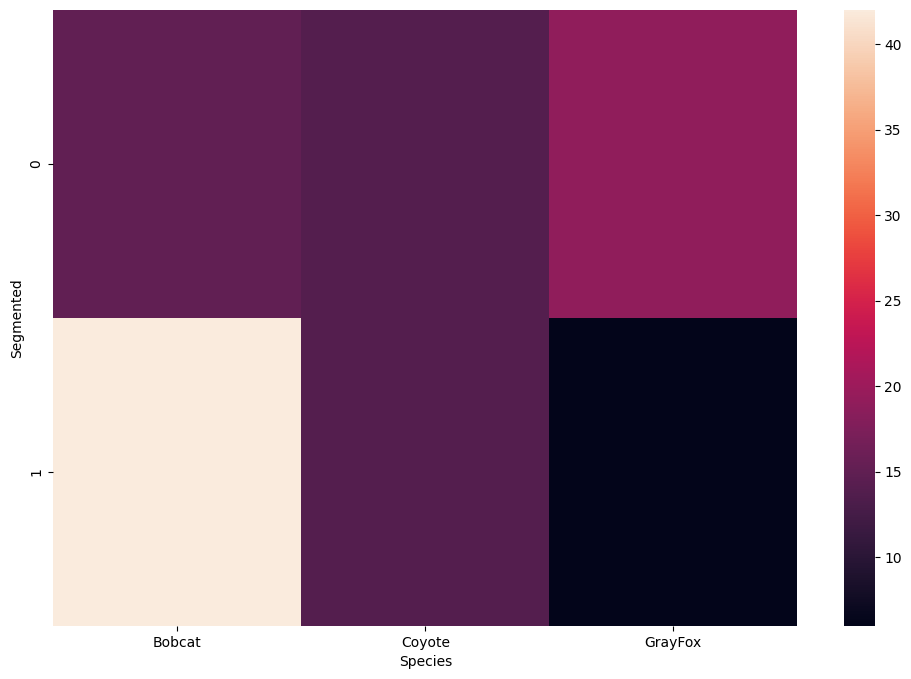

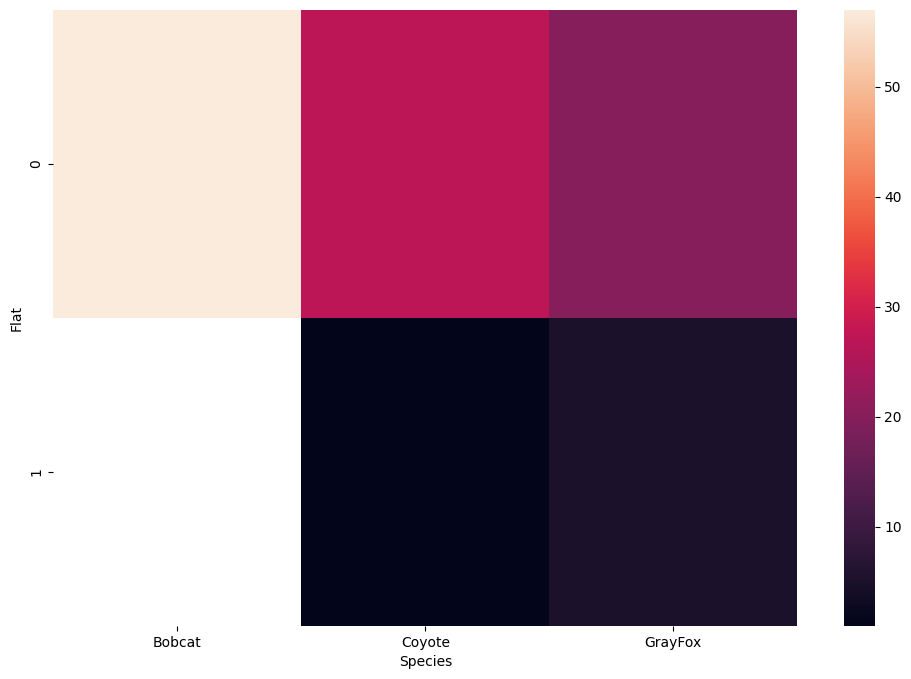

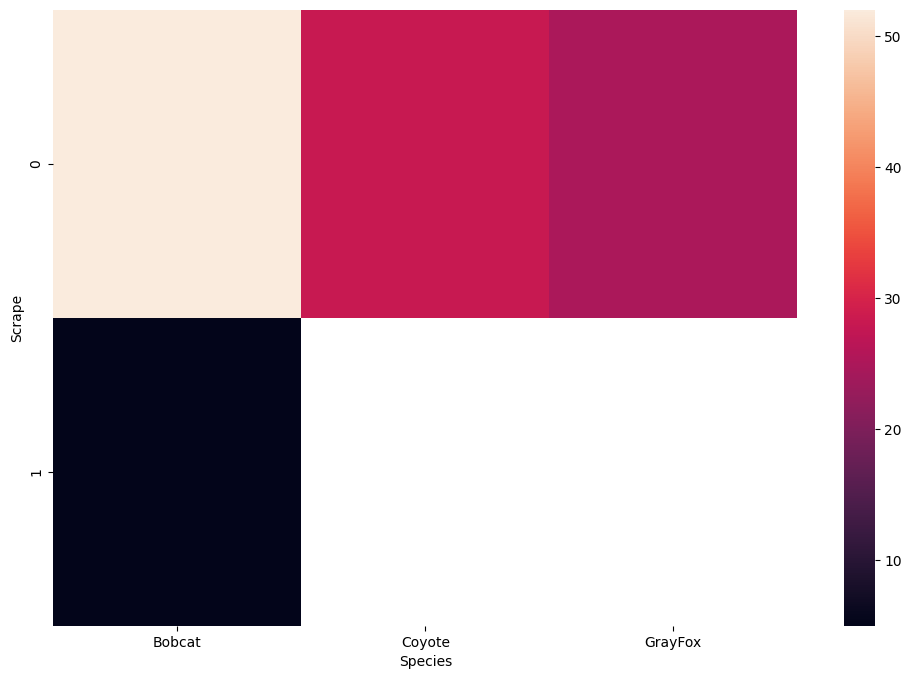

In [35]:

cat_cols = ["Number", "Ropey", "Segmented", "Flat", "Scrape"]

for col in cat_cols:
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.value_counts(subset=["Species", col]).unstack(level=0))
    ax.set_title(col.capitalize() + " vs Species")
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    plt.show()

At first glance, it looks like there are diffrent distributions of several features accross the different species. This is a good sign! 

We'll run chi-squared tests to make sure:

In [47]:
for col in cat_cols:
    print(col + ": ")
    for i in range(len(comb_names)):
        first, second = comb_names[i]
        df_to_test = df[(df["Species"] == first) | (df["Species"] == second)]
        combination_counts = df_to_test[["Species", col]].groupby(by=["Species", col]).size().unstack(level=0, fill_value=0)
        chi2, p, _, _ = stats.chi2_contingency(combination_counts[combination_counts.sum(axis=1) > 0])
        print(first + " vs " + second + " - p: " + str(p))
    print()

Number: 
Coyote vs Bobcat - p: 0.9244743565889734
Coyote vs GrayFox - p: 0.33013306182946683
Bobcat vs GrayFox - p: 0.18986803210650896

Ropey: 
Coyote vs Bobcat - p: 0.8846187282245666
Coyote vs GrayFox - p: 0.9210707841756833
Bobcat vs GrayFox - p: 0.9340084100507672

Segmented: 
Coyote vs Bobcat - p: 0.0546953750573125
Coyote vs GrayFox - p: 0.0958109770168663
Bobcat vs GrayFox - p: 7.474949131964824e-05

Flat: 
Coyote vs Bobcat - p: 0.7150307708655688
Coyote vs GrayFox - p: 0.14702162451781436
Bobcat vs GrayFox - p: 0.0028540146908198906

Scrape: 
Coyote vs Bobcat - p: 0.26057244057912143
Coyote vs GrayFox - p: 1.0
Bobcat vs GrayFox - p: 0.30444499284789844



It looks like flat and segmented are the best features for splitting the species, with p-values of less than 0.01, but just for telling bobcats and gray foxes apart, and only if these traits are present, which they aren't always are. These traits are, as a result, not super helpful for direct observation, but could be useful in a larger model with the other features taken into account. 

It then holds that strictly morphological traits may not be able to easily tell all three species apart, at least with the subset measured. We can tell gray foxes from the other two species, but without some biogeochemical tests, telling bobcats and coyotes apart could be hit or miss. 

## Discussion and Interpretation

The significant features were as follows:

|              |      | Coyote              | Bobcat              | Gray Fox            | comments        |
|--------------|------|---------------------|---------------------|---------------------|-----------------|
| <u>**diameter**</u> | mean | 19.54285714285714   | 19.00877192982456   | 11.975999999999999  | gray fox vs not |
| <u>            </u> | min  | 0.0                 | 13.0                | 0.0                 |                 |
| <u>            </u> | max  | 30.0                | 25.8                | 19.1                |                 |
| <u>**taper**   </u> | mean | 29.149553571428577  | 26.256862745098037  | 18.43111111111111   | gray fox vs not |
| <u>            </u> | min  | 0.0                 | 2.3                 | 0.0                 |                 |
| <u>            </u> | max  | 56.8                | 53.4                | 67.7                |                 |
| <u>**mass**    </u> | mean | 16.910625           | 12.482105263157894  | 5.63625             | gray fox vs not |
| <u>            </u> | min  | 0.94                | 1.5                 | 2.05                |                 |
| <u>            </u> | max  | 36.84               | 26.89               | 18.14               |                 |
| <u>**d13C**    </u> | mean | -24.821428571428573 | -27.699464285714285 | -27.280416666666664 | coyote vs not   |
| <u>            </u> | min  | -29.62              | -29.85              | -28.97              |                 |
| <u>            </u> | max  | -19.67              | -24.55              | -25.18              |                 |
| <u>**d15N**    </u> | mean | 10.377857142857142  | 6.382678571428571   | 6.46375             | coyote vs not   |
| <u>            </u> | min  | 3.97                | 1.84                | 3.9                 |                 |
| <u>            </u> | max  | 18.0                | 11.27               | 10.1                |                 |
| <u>**CN**      </u> | mean | 8.592857142857143   | 6.706607142857144   | 12.120833333333332  | bobcat vs not   |
| <u>            </u> | min  | 4.9                 | 4.5                 | 5.7                 |                 |
| <u>            </u> | max  | 15.4                | 10.4                | 23.6                |                 |

|               | Coyote | Bobcat | Gray Fox |
|---------------|--------|--------|----------|
| segmented     | 14     | 42     | 6        |
| not segmented | 14     | 15     | 19       |
| flat          | 1      | 0      | 5        |
| not flat      | 27     | 57     | 20       |

Gray fox scat is most easily recognizable by its morphological traits, like diameter, taper, and mass, all three of which are significantly smaller than either coyote or bobcat scat. On the other hand, coyote scat was easily distinguishable by its high biogeochemical traits of d13C and d15N. Bobcats can be told apart by their low Carbon-Nitrogen ratio. Bobcats and gray foxes can be told apart by segmentation or flatness, but this is largely unhelpful on its own given the other separatable traits. These could be very helpful in a larger model though.

These trends largely make sense though. Gray foxes are much smaller than both coyotes and bobcats, so it is expected that the samples would overall be smaller. Bobcats having a significantly lower C:N ratio also makes sense, as they don't eat many plants, the main source of Carbon. 

Being able to use solely the morphological and biogeochemical traits means that scat can just be quickly observed, measured, and collected, coming with a number of objective features instead of more subjectively collected contextual traits. This means that the data can be more consistently collected by different people, potentially mitigating the amount of training required for gatherers. Less can go wrongm as there is less guesswork involved. 

## Conclusion

